# Problem 1



In [84]:
from scipy.io import loadmat
ocr = loadmat('ocr.mat')

import matplotlib.pyplot as plt
import numpy as np
import random


### Nearest neighbor classifier

In [85]:
def n_n_classifier(X, Y, test):
    """Implements the nearest neighbor classifier 
    
    Arguments:
        X: matrix of training feature vectors X (one data point per row).
        Y: vector of corresponding labels.
        test: matrix of test feature vectors (one test vector per row). 
    
    Returns:    
        vector of the predicted labels for all test vectors"""

    sqdist = np.sum(X**2, axis=1)[:, np.newaxis] - 2 * np.matmul(X, test.T) + np.sum(test**2, axis=1)  
    preds = Y[sqdist.argmin(0)]
    return preds


### Evaluating the nearest neighbor classifier

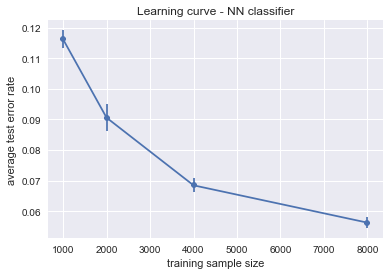

In [86]:
def test_error_rates(training, labels, test, test_labels, N, i):
    """compute matrix of test error rates for the n-n classifier 
    
    Arguments:
        X: matrix of training feature vectors X (one data point per row).
        Y: vector of corresponding training labels.
        test: matrix of test feature vectors (one test vector per row).
        test_labels: vector of corresponding test labels.
        N: vector containing various sizes of training samples to be randomly selected
        i: number of repetitions to compute average test error rates for each random training sample
    
    Returns:    
        Matrix of i test error rate vectors. The i-th row vector of size |N|, contains the test error
        rates for each training sample size in N, for the i-th repetition"""
    
    err_lists = []
    for k in range(i):         
        test_error_rate = []
        for n in N:   
            sel = random.sample(xrange(60000),n)
            X = training[sel]
            Y = labels[sel]           
            preds = n_n_classifier(X, Y, test)
            error_rate = np.sum(preds <> test_labels) / float(len(test))
            test_error_rate.append(error_rate)
        err_lists.append(test_error_rate)
    return err_lists


N = [1000, 2000, 4000, 8000]
i = 10
training = ocr['data'].astype('float')
labels = ocr['labels']
test = ocr['testdata'].astype('float')
test_labels = ocr['testlabels']
err_lists = test_error_rates(training, labels, test, test_labels, N, i)


%matplotlib inline
plt.errorbar(N, np.mean(err_lists, axis=0), yerr=np.std(err_lists, axis=0), marker='8', capsize = 4)
plt.title('Learning curve - NN classifier')
plt.ylabel('average test error rate')
plt.xlabel('training sample size')